In [204]:
#load libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 

# here I load output from UNPERTURBED run (from twiss tfs file) 

In [205]:
#just declaring a list for each column
name,s,betx,alphx,bety,alphy,mux,muy = [],[],[],[],[],[],[],[]

#open tfs file with UNPERTURBED DATA and read line by line, store each line as a string in a list
filename = "/Users/sebastiankalos/Documents/CERN_2021/forSebastian/output/twiss_unperturbed.tfs"
copy_lines=[]
with open(filename) as f:
    lines = f.readlines()

for line in lines:
    split_line = line.split()
    copy_lines.append(split_line)

#from each line, extract a name/number and append it into its relevant column
for i in range(48,len(copy_lines)-1): #49th line in the file is the first relevant one
    line = copy_lines[i]

    name.append(line[0])
    s.append(line[1])
    betx.append(line[2])
    alphx.append(line[3])
    bety.append(line[4])
    alphy.append(line[5])
    mux.append(line[6])
    muy.append(line[7])

#extracted values are strings --> cast numbers to floats
for i in range(0, len(betx)):
    s[i] = float(s[i])
    betx[i] = float(betx[i])
    alphx[i] = float(alphx[i])
    bety[i] = float(bety[i])
    alphx[i] = float(alphx[i])
    mux[i] = float(mux[i])
    muy[i] = float(muy[i])

# here I load output from run with assigned field arrors (from twiss tfs file) 

In [206]:
#open twiss.tfs and read line by line, store each line as a string in a list
filename = "/Users/sebastiankalos/Documents/CERN_2021/forSebastian/output/twiss.tfs"
copy_lines=[]
with open(filename) as f:
    lines = f.readlines()

for line in lines:
    split_line = line.split()
    copy_lines.append(split_line)

#just declaring a list for each column
betx_err,alphx_err,bety_err,alphy_err,mux_err,muy_err = [],[],[],[],[],[]

#from each line, extract a name/number and append it into its relevant column
for i in range(48,len(copy_lines)-1): #49th line in the file is the first relevant one
    line = copy_lines[i]

    betx_err.append(line[2])
    alphx_err.append(line[3])
    bety_err.append(line[4])
    alphy_err.append(line[5])
    mux_err.append(line[6])
    muy_err.append(line[7])

#extracted values are strings --> cast numbers to floats
for i in range(0, len(betx_err)):
    betx_err[i] = float(betx_err[i])
    alphx_err[i] = float(alphx_err[i])
    bety_err[i] = float(bety_err[i])
    alphx_err[i] = float(alphx_err[i])
    mux_err[i] = float(mux_err[i])
    muy_err[i] = float(muy_err[i])

# just plots of beta functions here - for check

Text(0, 0.5, 'Beta Y [m]')

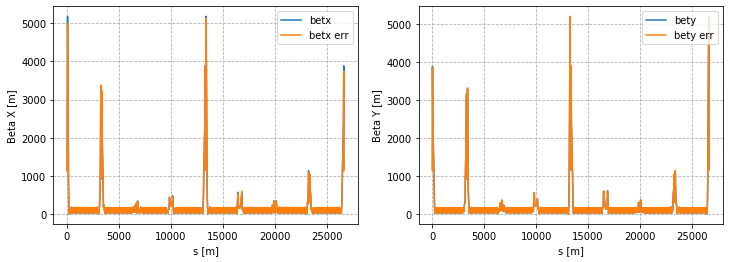

In [210]:
fig, (plt1, plt2) = plt.subplots(1, 2, figsize=(12, 4))

plt1.plot(s,betx,label='betx')
plt1.plot(s,betx_err,label='betx err')
plt1.legend(loc="upper right")
plt1.grid(linestyle='--')
plt1.set_xlabel('s [m]')
plt1.set_ylabel('Beta X [m]')


plt2.plot(s,bety,label='bety')
plt2.plot(s,bety_err,label='bety err')
plt2.legend(loc="upper right")
plt2.grid(linestyle='--')
plt2.set_xlabel('s [m]')
plt2.set_ylabel('Beta Y [m]')

# next I calculate and plot the phase advance shift - in other words, by how much the phase changes from the unperturbed case when field errors are assigned.

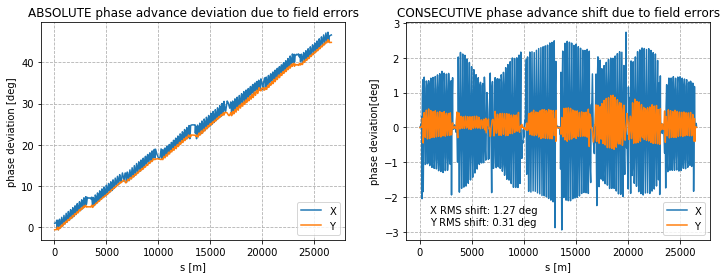

In [211]:
mux = np.array(mux) #just cast list with BPM phases into an arry
muy = np.array(muy)

# get an array of phase advances between consecutive BPMs for unperturbed sequence and cast it into an array
x_advance = []
y_advance = []
for i in range(1,len(mux)):
    x_advance.append(mux[i]-mux[i-1])
for i in range(1,len(muy)):
    y_advance.append(muy[i]-muy[i-1])
x_advance=np.array(x_advance)
y_advance=np.array(y_advance)

# get an array of phase advances between consecutive BPMS - from sequence with field errors
x_err_advance = []
y_err_advance = []
for i in range(1,len(mux_err)):
    x_err_advance.append(mux_err[i]-mux_err[i-1])
for i in range(1,len(muy_err)):
    y_err_advance.append(muy_err[i]-muy_err[i-1])
x_err_advance=np.array(x_err_advance)
y_err_advance=np.array(y_err_advance)

# compute the difference between phase advance with and without field errors between consecutive BPMs
x_advance_diff = x_err_advance - x_advance
y_advance_diff = y_err_advance - y_advance

# compute the phase difference (ABSOLUTE) between unperturbed sequence and one with errors
mux_err = np.array(mux_err)
muy_err = np.array(muy_err)
mux_diff = mux_err-mux
muy_diff = muy_err-muy

fig, (plt1, plt2) = plt.subplots(1, 2, figsize=(12, 4)) #initialize a double plot

#first plot - absolute phase difference
plt1.plot(s, mux_diff*360, label='X')
plt1.plot(s, muy_diff*360, label='Y')
plt1.legend(loc="lower right")
plt1.grid(linestyle='--')
plt1.set_xlabel('s [m]')
plt1.set_ylabel('phase deviation [deg]')
plt1.set_title('ABSOLUTE phase advance deviation due to field errors')

#second plot - consecutive phace advance shift
plt2.plot(s[1:], x_advance_diff*360, label='X')
plt2.plot(s[1:], y_advance_diff*360, label='Y')
plt2.legend(loc="lower right")
plt2.grid(linestyle='--')
plt2.set_xlabel('s [m]')
plt2.set_ylabel('phase deviation[deg]')
plt2.set_title('CONSECUTIVE phase advance shift due to field errors')

#get RMS values in degs (for consecutive phase advance)
rms_shift_x = np.sqrt(np.sum(np.square(x_advance_diff*360))/len(x_advance_diff*360))
rms_shift_y = np.sqrt(np.sum(np.square(y_advance_diff*360))/len(y_advance_diff*360))

#display RMS values in the plot
in_plot_text = "X RMS shift: {:.2f} deg\nY RMS shift: {:.2f} deg".format(rms_shift_x, rms_shift_y)
plt2.text(1000, -2.8, in_plot_text, fontsize=10)

plt.savefig('lhc_phase_advance_shift.png', dpi=300)

# here I calculate and plot beta beating

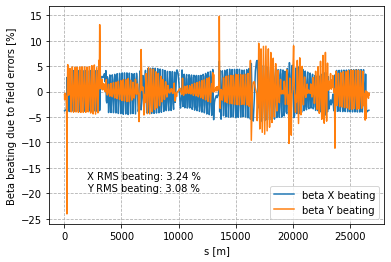

In [209]:
# get beta x beating
betx = np.array(betx)
betx_err = np.array(betx_err)
betx_diff = betx_err-betx
betx_beating = betx_diff/betx*100 #in percent!

#get beta y beating
bety = np.array(bety)
bety_err = np.array(bety_err)
bety_diff = bety_err-bety
bety_beating = bety_diff/betx*100 #in percent!

# plot beta beating
plt.plot(s, betx_beating, label='beta X beating')
plt.plot(s, bety_beating, label='beta Y beating')
plt.legend(loc="lower right")
plt.grid(linestyle='--')
plt.xlabel('s [m]')
plt.ylabel('Beta beating due to field errors [%]')

# calculate RMS of beta beating
rms_beating_x = np.sqrt(np.sum(np.square(betx_beating))/len(betx_beating))
rms_beating_y = np.sqrt(np.sum(np.square(bety_beating))/len(bety_beating))

# show the RMS values on the plot
in_plot_text = "X RMS beating: {:.2f} %\nY RMS beating: {:.2f} %".format(rms_beating_x, rms_beating_y)
plt.text(2000, -19.5, in_plot_text, fontsize=10)

plt.savefig('lhc_beta_beating.png', dpi=300) #save the plot in high res